<a href="https://colab.research.google.com/github/Ruoro/Mchezopesa_Footbal_predictions/blob/main/Moringa_week_6_IP_John_Ruoro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Define the Question 

### a. Question.  

We have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task: 

 - A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### b. Metrics for success

The analysis will be considered complete and successful when:

- Perform EDA
- Perform any necessary feature engineering
- Check of multicollinearity
- Start building the model
- Predict the goals of the home and away teams
- Perform a K-fold to see the model that works best 

### c Understanding the context. 


he men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. 

### d. d) Recording the Experimental Design
The following steps will be followed in conducting this analysis:

- Defining the Question
- Reading the Data.
- Checking the Data.
- Data Cleaning
- Merging the Dataframes
- Performing EDA
- Prediction Models
- Evaluation of the solution
- Challenging the solution
- Conclusion

# Load datasets

In [95]:
# Importing all the required libraries. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling 
%matplotlib inline


In [96]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=7995df7303c43bd47001bcdd2bd9438b5a88df9d22c962f147276c93604ff568
  Stored in directory: /tmp/pip-ephem-wheel-cache-g65w1kr8/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [97]:
# Rank dataframe
rank = pd.read_csv('/content/fifa_ranking.csv')
rank.shape

(57793, 16)

In [98]:
# Result Dataframe
result = pd.read_csv('/content/results.csv')
result.shape

(40839, 9)

### Preview the datasets. 

In [99]:
# first five
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [100]:
# first five
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [101]:
# last five
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [102]:
# last five
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


## Checking the datasets 

### Rank dataset. 

In [103]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [104]:
rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


### Result dataset

In [105]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [106]:
result.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# Cleaning the data

### Rank dataset. 

In [107]:
# check for missing values
rank.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

There are no missing values in the rank dataset. 

In [108]:
# Check for duplicated data
rank.duplicated().sum()

37

There are 37 duplicated records in the rank dataset. 

In [109]:
# droping the duplicated data
print(rank.shape) 
rank.drop_duplicates(inplace= True)
print(rank.shape)

(57793, 16)
(57756, 16)


The duplicates have been successfully dropped. 

In [110]:
# Uniformity. 
rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

The column names are properly named. 

In [111]:
#check for the data types
rank.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

The rank_date column has to be convertated to date-time format. 

In [112]:
rank['date'] = pd.to_datetime(rank.rank_date)
rank.drop('rank_date', axis= 1, inplace=True)
rank.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
date                       datetime64[ns]
dtype: object

The rank date has been successfully converted to the date_time format. 

### Result dataset. 

In [113]:
# check for missing values
result.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

The dataset does not have any missing values

In [114]:
# Check for duplicated data
result.duplicated().sum()

0

The dataset does not have any duplicated records

In [115]:
# Uniformity. 
result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

The data follows a uniform naming convention. 

In [116]:
#check for the data types
result.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

The date colum will have to be changed into the date time format. 

In [117]:
result.date = pd.to_datetime(result.date)
result.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

The date column was successfully converted to the date_time column

# Merging the data

In [118]:
# 
rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date'],
      dtype='object')

In [119]:
result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

The rank of the away and home teams should be tetwrmined in the final dataset. 
Therefore, we need to merge in two phases. 

In [120]:
# merge phase 1
# drop all the columns on the rank dataset except the country and rank
# the country column will be renamed for easier merging
home_rank_df = rank[['rank', 'country_full', 'date']]
home_rank_df.rename(columns = {'country_full' : 'home_team'}, inplace=True)
home_rank_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,home_team,date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08
...,...,...,...
57788,206,Anguilla,2018-06-07
57789,206,Bahamas,2018-06-07
57790,206,Eritrea,2018-06-07
57791,206,Somalia,2018-06-07


In [121]:
# Merge the temp home_rank df with the result df
merged_home = pd.merge(home_rank_df, result, how='inner', on=['date','home_team'])
merged_home

,rank,home_team,date,away_team,home_score,away_score,tournament,city,country,neutral
0,8,Brazil,1993-08-08,Mexico,1,1,Friendly,Maceió,Brazil,False
1,35,Ecuador,1993-08-08,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
2,50,Zimbabwe,1993-08-08,Eswatini,2,0,Friendly,Harare,Zimbabwe,False
3,59,Bolivia,1993-08-08,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
4,65,Guinea,1993-08-08,Sierra Leone,1,0,Friendly,Conakry,Guinea,False
...,...,...,...,...,...,...,...,...,...,...
952,4,Portugal,2018-06-07,Algeria,3,0,Friendly,Lisbon,Portugal,False
953,12,England,2018-06-07,Costa Rica,2,0,Friendly,Leeds,England,False
954,14,Uruguay,2018-06-07,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False
955,22,Iceland,2018-06-07,Ghana,2,2,Friendly,Reykjavík,Iceland,False


There are 957 records in the first home_team df

In [122]:
# Repeat the process for the away teams
# drop all the columns on the rank dataset except the country and rank
# the country column will be renamed for easier merging
away_rank_df = rank[['rank', 'country_full', 'date']]
away_rank_df.rename(columns = {'country_full' : 'away_team'}, inplace=True)
# merging
merged_away = pd.merge(away_rank_df, result, how='inner', on=['date','away_team'])
merged_away

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,away_team,date,home_team,home_score,away_score,tournament,city,country,neutral
0,5,Argentina,1993-08-08,Paraguay,1,3,FIFA World Cup qualification,Asunción,Paraguay,False
1,14,Mexico,1993-08-08,Brazil,1,1,Friendly,Maceió,Brazil,False
2,19,Colombia,1993-08-08,Peru,0,1,FIFA World Cup qualification,Lima,Peru,False
3,22,Uruguay,1993-08-08,Bolivia,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
4,86,Sierra Leone,1993-08-08,Guinea,1,0,Friendly,Conakry,Guinea,False
...,...,...,...,...,...,...,...,...,...,...
928,47,Ghana,2018-06-07,Iceland,2,2,Friendly,Reykjavík,Iceland,False
929,59,Bolivia,2018-06-07,South Korea,0,0,Friendly,Innsbruck,Austria,True
930,66,Algeria,2018-06-07,Portugal,3,0,Friendly,Lisbon,Portugal,False
931,95,Uzbekistan,2018-06-07,Uruguay,3,0,Friendly,Montevideo,Uruguay,False


In [123]:
# Merging phase 2 
# now we can merge the two merged dfs: Merged_home and merged_away
# Both of these df have numerous similarities with only a change in the rank column 
# By using the similar columns as the basis for the merge we can get a good clean dataset. 
similar_columns = ['away_team', 'home_team', 'home_score', 'away_score',
                   'tournament', 'city','country', 'neutral', 'date']
fin_merge = pd.merge(merged_away, merged_home, how='inner', on= similar_columns)
fin_merge

,rank_x,away_team,date,home_team,home_score,away_score,tournament,city,country,neutral,rank_y
0,5,Argentina,1993-08-08,Paraguay,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67
1,14,Mexico,1993-08-08,Brazil,1,1,Friendly,Maceió,Brazil,False,8
2,19,Colombia,1993-08-08,Peru,0,1,FIFA World Cup qualification,Lima,Peru,False,70
3,22,Uruguay,1993-08-08,Bolivia,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59
4,86,Sierra Leone,1993-08-08,Guinea,1,0,Friendly,Conakry,Guinea,False,65
...,...,...,...,...,...,...,...,...,...,...,...
866,23,Costa Rica,2018-06-07,England,2,0,Friendly,Leeds,England,False,12
867,47,Ghana,2018-06-07,Iceland,2,2,Friendly,Reykjavík,Iceland,False,22
868,66,Algeria,2018-06-07,Portugal,3,0,Friendly,Lisbon,Portugal,False,4
869,95,Uzbekistan,2018-06-07,Uruguay,3,0,Friendly,Montevideo,Uruguay,False,14


The merge is complete with the rank of both the home and away teams. The final df has 871 rows.

In [124]:
fin_merge.rename(columns= {'rank_x': 'away_rank', 'rank_y': 'home_rank'}, inplace=True )
fin_merge

,away_rank,away_team,date,home_team,home_score,away_score,tournament,city,country,neutral,home_rank
0,5,Argentina,1993-08-08,Paraguay,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67
1,14,Mexico,1993-08-08,Brazil,1,1,Friendly,Maceió,Brazil,False,8
2,19,Colombia,1993-08-08,Peru,0,1,FIFA World Cup qualification,Lima,Peru,False,70
3,22,Uruguay,1993-08-08,Bolivia,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59
4,86,Sierra Leone,1993-08-08,Guinea,1,0,Friendly,Conakry,Guinea,False,65
...,...,...,...,...,...,...,...,...,...,...,...
866,23,Costa Rica,2018-06-07,England,2,0,Friendly,Leeds,England,False,12
867,47,Ghana,2018-06-07,Iceland,2,2,Friendly,Reykjavík,Iceland,False,22
868,66,Algeria,2018-06-07,Portugal,3,0,Friendly,Lisbon,Portugal,False,4
869,95,Uzbekistan,2018-06-07,Uruguay,3,0,Friendly,Montevideo,Uruguay,False,14


In [125]:
fifa_df = fin_merge [['date','away_rank', 'away_team','home_team','home_rank', 'home_score',
                      'away_score', 'tournament', 'city', 'country', 'neutral' ]]
fifa_df.head ()

,date,away_rank,away_team,home_team,home_rank,home_score,away_score,tournament,city,country,neutral
0,1993-08-08,5,Argentina,Paraguay,67,1,3,FIFA World Cup qualification,Asunción,Paraguay,False
1,1993-08-08,14,Mexico,Brazil,8,1,1,Friendly,Maceió,Brazil,False
2,1993-08-08,19,Colombia,Peru,70,0,1,FIFA World Cup qualification,Lima,Peru,False
3,1993-08-08,22,Uruguay,Bolivia,59,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
4,1993-08-08,86,Sierra Leone,Guinea,65,1,0,Friendly,Conakry,Guinea,False


Now that we have the final dataset, let us check the dataset. 

In [126]:
fifa_df.isna().sum()

date          0
away_rank     0
away_team     0
home_team     0
home_rank     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

# 5. Analysis of the data

### Univariate analysis


For the Univariate analysis, I decided to go with the pandas profiling tool. 

In [127]:
from pandas_profiling import ProfileReport

profile = ProfileReport(fifa_df, title="FIFA Dataset Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the report we can infer:
- The distinct values of each column
- Measures of dispersion of the numerical columns

In [128]:
profile.to_file(output_file="FIFA_Dataset_Profile_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Bivariate Analysis

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


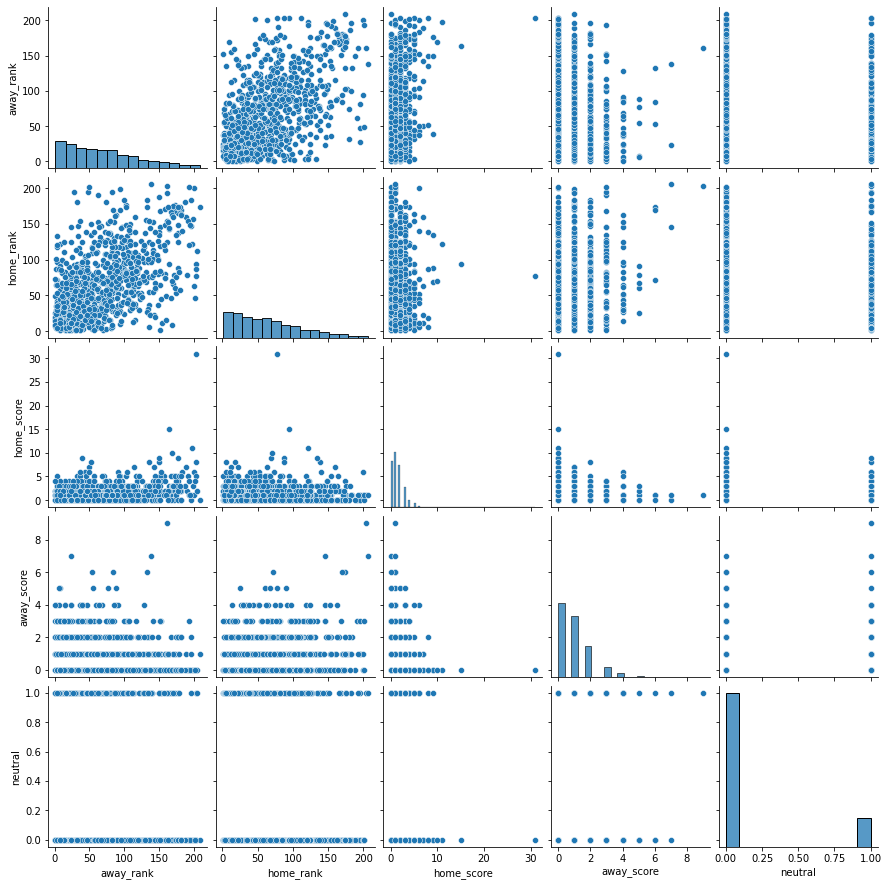

In [129]:
sns.pairplot(fifa_df)

The pair plot shows that there is a strong correlation between :
- away rank and home rank


In [130]:
# The next part is using a pearsons_r corelation heatmap. 
corr = fifa_df.corr()
corr

,away_rank,home_rank,home_score,away_score,neutral
away_rank,1.000000,0.534618,0.309322,-0.151524,0.072782
home_rank,0.534618,1.000000,-0.043381,0.143060,0.059212
home_score,0.309322,-0.043381,1.000000,-0.132413,0.001156
away_score,-0.151524,0.143060,-0.132413,1.000000,0.088183
neutral,0.072782,0.059212,0.001156,0.088183,1.000000


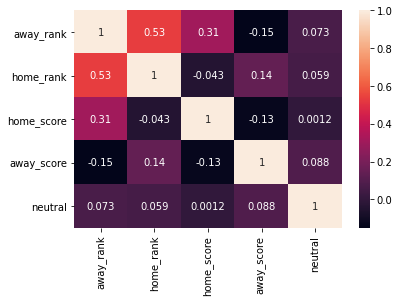

In [131]:
#for good visualization we can use a heat map,
sns.heatmap(corr, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

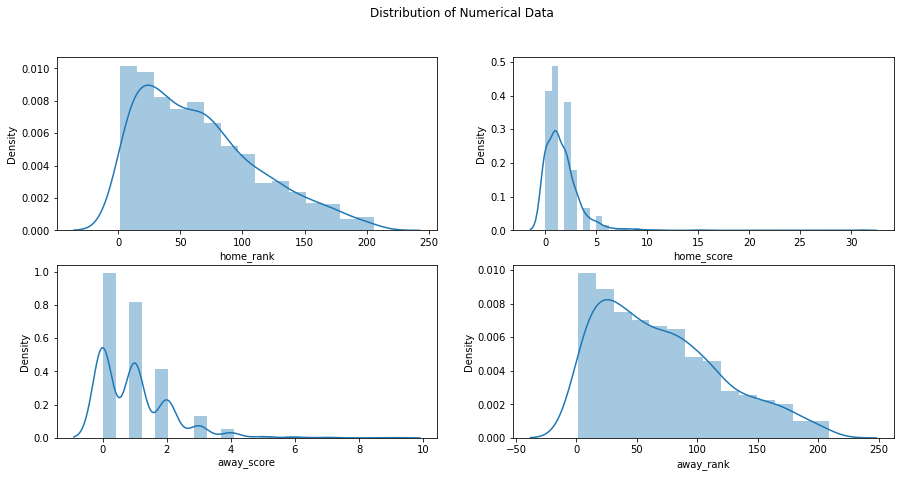

In [132]:
# We should check the didtribution of the data.
# Using the seaborn distplot 

fig, axes = plt.subplots(2, 2,  figsize=(15, 7))

fig.suptitle('Distribution of Numerical Data')

sns.distplot( fifa_df["home_rank"] , ax=axes[0, 0])
sns.distplot( fifa_df["home_score"] , ax=axes[0, 1])
sns.distplot( fifa_df["away_score"] , ax=axes[1, 0])
sns.distplot( fifa_df["away_rank"] , ax=axes[1, 1])

The data is distributednormaly with a a positive skew. 

Text(0.5, 1.0, 'Tournament by popularity')

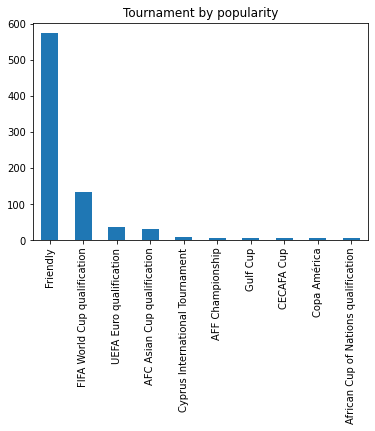

In [133]:
#The tounament makes up the bul of our work  with the most matches. 
fifa_df['tournament'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title("Tournament by popularity")


# 6.  Predictions. 

There are to be two prediction models created. 
- Model 1: Predict how many goals the home team scores.

* Model 2: Predict how many goals the away team scores.

#### Mutlicolinearity 

In [134]:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,away_rank,home_rank,home_score,away_score,neutral
away_rank,1.771717,-1.015088,-0.545585,0.350172,-0.099092
home_rank,-1.015088,1.605433,0.338687,-0.339373,0.008354
home_score,-0.545585,0.338687,1.186692,0.024591,0.016114
away_score,0.350172,-0.339373,0.024591,1.114007,-0.103656
neutral,-0.099092,0.008354,0.016114,-0.103656,1.015839


The multicollinearity are <5 and <10. therefore, that means that the correlation index is negligable. Therefore, wecan proceed with the prediction analysis. 

## Model 1. Predict how many goals the home team scores.

In [135]:
# Importing all the neccesary libraries. 
# Some of the libraries include the sklearn and the scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [136]:
fifa_df.head()

,date,away_rank,away_team,home_team,home_rank,home_score,away_score,tournament,city,country,neutral
0,1993-08-08,5,Argentina,Paraguay,67,1,3,FIFA World Cup qualification,Asunción,Paraguay,False
1,1993-08-08,14,Mexico,Brazil,8,1,1,Friendly,Maceió,Brazil,False
2,1993-08-08,19,Colombia,Peru,70,0,1,FIFA World Cup qualification,Lima,Peru,False
3,1993-08-08,22,Uruguay,Bolivia,59,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
4,1993-08-08,86,Sierra Leone,Guinea,65,1,0,Friendly,Conakry,Guinea,False


In [137]:
# Polynomial approach
# copy of the dataframe
df = fifa_df

# Then we have to drop a few columns for instance
drop_cols = ['date', 'away_team', 'home_team', 'city', 'country', ]

df. drop(drop_cols, axis =1,  inplace=True)
df.head


<bound method NDFrame.head of      away_rank  home_rank  ...                    tournament  neutral
0            5         67  ...  FIFA World Cup qualification    False
1           14          8  ...                      Friendly    False
2           19         70  ...  FIFA World Cup qualification    False
3           22         59  ...  FIFA World Cup qualification    False
4           86         65  ...                      Friendly    False
..         ...        ...  ...                           ...      ...
866         23         12  ...                      Friendly    False
867         47         22  ...                      Friendly    False
868         66          4  ...                      Friendly    False
869         95         14  ...                      Friendly    False
870        120         97  ...          Intercontinental Cup    False

[871 rows x 6 columns]>

In [138]:
# Label encoding
labelencoder = LabelEncoder()
df['tournament'] = labelencoder.fit_transform(df['tournament'])
df['neutral'] = labelencoder.fit_transform(df['neutral'])



In [139]:
# previewdataset
df.head()

,away_rank,home_rank,home_score,away_score,tournament,neutral
0,5,67,1,3,16,0
1,14,8,1,1,17,0
2,19,70,0,1,16,0
3,22,59,3,1,16,0
4,86,65,1,0,17,0


In [140]:
# Define X and Y
X = df.drop ('away_score', axis= 1)
y = df['away_score']


In [141]:
# Split data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [142]:
# Scaling the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [143]:
# Polinomial regression 
poly_reg = PolynomialFeatures(degree = 4) 
X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)


pol_reg = LinearRegression()
pol_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
#making the prediction
y_predict = pol_reg.predict(X_test)
y_predict


array([ 1.21815534,  1.21946514,  1.25249069,  1.30034428,  0.80497369,
        1.33796545,  0.96306536,  0.79629945,  1.39147336,  0.93347122,
        0.7234231 ,  0.92024289,  2.01482977,  0.61467454,  0.69642696,
        1.51002925,  0.76313902,  0.6356733 ,  0.88755617,  1.0352102 ,
        1.48155378,  1.32848375,  1.26081304,  1.21815534,  1.11942844,
       -9.45233801,  1.54268884,  1.3074823 ,  0.37344725,  0.90028292,
        1.2764812 ,  1.52721221,  0.94946394,  0.94988143,  1.28676555,
        0.97668895,  0.96743524,  4.95412156,  1.06610687,  0.94235744,
        1.07550186,  0.90174951,  0.9660245 ,  0.91601128,  0.69822688,
        1.02642113,  1.30679233, -0.0942241 ,  4.46240598,  1.13584272,
        1.00134726,  1.23115656,  0.96969636,  0.92154603,  1.19275968,
        2.08839846,  1.68107741,  1.23745202,  2.23050816,  0.76057089,
        0.96155277,  0.89549011,  1.03460072,  1.31156453,  0.87941848,
        0.74616027,  0.47578833,  1.39506576,  0.90172237,  1.01

In [145]:
# calculate MAE and RMSE
import sklearn.metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error:  1.116758376983044
Root Mean Squared Error:  1.987078716071578


The low RMSE and MAE score of our model shows that the model is accurate. 

#### Residual plots and the Heteroskedasticity test

In [146]:
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.04436690562296606

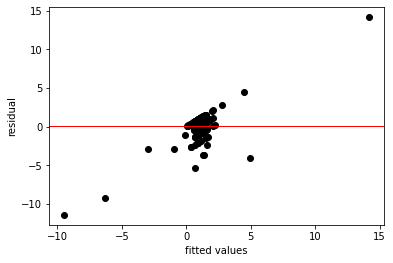

In [147]:
# Plot the residual plot of Away scores
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

### Bartlet's test 

In [148]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


## Model 2. Predict how many goals the Home team scores. 

In [149]:
# define x AND y 
X = df.drop("home_score", axis = 1)
y = df['home_score']

# split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scaling the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Polinomial regression 
poly_reg = PolynomialFeatures(degree = 4) 
X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)


pol_reg = LinearRegression()
pol_reg.fit(X_train,y_train)

# Making the prediction
y_predict = pol_reg.predict(X_test)
y_predict

# calculate MAE and RMSE
import sklearn.metrics
print("Mean Absolute Error(home prediction): ", metrics.mean_absolute_error(y_test, y_predict))
print("Root Mean Squared Error(home prediction): ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error(home prediction):  2.464845613668893
Root Mean Squared Error(home prediction):  6.734395192204655


In [150]:
from sklearn.metrics import r2_score
r2_score(y_predict, y_test)


-0.0743733021168611

In [151]:
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()


0.3842717527433206

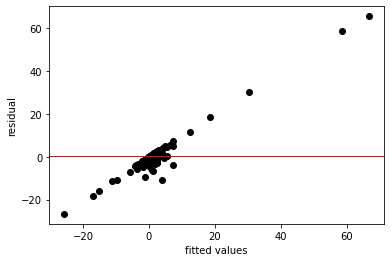

In [152]:
# Plot the residual plot of Home scores
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#### Bartlets test

In [153]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


the variances are homogeneous!


## Cross Validation. 

In [154]:
from sklearn.model_selection import KFold

# Define X and y
X = df.drop("home_score", axis = 1)
y = df['home_score']

folds = KFold(n_splits=10)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 10 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 10 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  # fit a model accordingly
  poly_reg = PolynomialFeatures(degree = 3) 
  X_train = poly_reg.fit_transform(X_train)
  X_test = poly_reg.fit_transform(X_test)


  pol_reg = LinearRegression()
  pol_reg.fit(X_train,y_train)
  
  # assess the accuraccy of the model
  y_predict = pol_reg.predict(X_test)
  
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_predict))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

print("\n The mean RMSE is: ", RMSES)

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4833760978481756

Training model 2
Model 2 Root Mean Squared Error: 1.5173686188958215

Training model 3
Model 3 Root Mean Squared Error: 3.083468085680064

Training model 4
Model 4 Root Mean Squared Error: 1.4037707310900025

Training model 5
Model 5 Root Mean Squared Error: 1.9552706029810214

Training model 6
Model 6 Root Mean Squared Error: 1.3894196492114441

Training model 7
Model 7 Root Mean Squared Error: 1.404582943734643

Training model 8
Model 8 Root Mean Squared Error: 1.2043958742000536

Training model 9
Model 9 Root Mean Squared Error: 1.5478201930687474

Training model 10
Model 10 Root Mean Squared Error: 2.5851006158535257

 The mean RMSE is:  [1.4833760978481756, 1.5173686188958215, 3.083468085680064, 1.4037707310900025, 1.9552706029810214, 1.3894196492114441, 1.404582943734643, 1.2043958742000536, 1.5478201930687474, 2.5851006158535257]


In [155]:
def Average(lst):
    return sum(lst) / len(lst)

a = Average(RMSES)
print("\n The average of the RMSE is : ", a)


 The average of the RMSE is :  1.7574573412563503


Thus, the Model works well for most models except model 3 and model 10 .

# Logistic Approach. 

In [156]:
# Add the win lose and draw column
df['result'] = df.home_score - df.away_score
a = df.home_score - df.away_score

def outcome(a):
  if a > 0:
    return 'Win '
  elif a < 0:
    return 'Loss'
  else:
    return 'Draw'

In [157]:
# creating a new column to give the match outcome
df['result']= df.result.apply(lambda a: outcome(a))

In [158]:
# encoding the reuslt column
df['result'] = labelencoder.fit_transform(df['result'])
df.head()

,away_rank,home_rank,home_score,away_score,tournament,neutral,result
0,5,67,1,3,16,0,1
1,14,8,1,1,17,0,0
2,19,70,0,1,16,0,1
3,22,59,3,1,16,0,2
4,86,65,1,0,17,0,2


In [159]:
# LogisticRegression
# Define X and Y 
X = df.drop('result', axis =1 )
y = df['result']

# train test split. (70:30 ratio)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scaling the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LogisticRegression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 81,   0,   0],
       [  0,  74,   0],
       [  0,   0, 107]])

In [160]:
LogReg.score(X_test, y_test)

1.0

The model abose shows 100 percent accuracy. 

## Challenging the Solution

# Hyper parameter tuning


In [161]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

# We will try tuning the model with grid search. 
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [162]:
print(all_accuracies.mean())

0.9868852459016393


In [163]:
# for higher accuracy we will use the parameters below 
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [164]:
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [165]:
# After the instatiating the method we have to call the fit method
gd_sr.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [166]:
# The best accuracy will be 
best_result = gd_sr.best_score_
print(best_result)

0.9885245901639343


# Conclusion.

The analysis can be considered successfull as we were able to perform all the tests we had set out to achive at the beginning. The models have been developed and their accuracy and RMSEs stated after each prediction. 